# Description of the project

Research of apartment sale ads

The Yandex service data is at your disposal.Real estate is an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your task is to set the parameters. This will allow you to build an automated system: it will track down anomalies and fraudulent activity. 

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and a reservoir.

## General information

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read
df = pd.read_csv('real_estate_data.csv', sep=',', index_col=0) 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Info
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Describe
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Summary

The table contains 22 columns with different data types. The total number of observations is 23699 values. From the information about the table, it can be seen that most of the columns have missing values. Note that some columns need to be recoded to a different data type.

In [5]:
# Remove duplicates from the table
df.drop_duplicates().reset_index(drop=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
# Fill in the missing values in the kitchen_area column
total_median = df['total_area'].median()
kitchen_median = df['kitchen_area'].median()
living_median = df['living_area'].median()
kitchen_total_ratio = kitchen_median / total_median
living_total_ratio = living_median / total_median
def count_kitchen_area (row):
    total = row['total_area']
    living = row['living_area']
    kitchen = row['kitchen_area']
    if (living > 0) & (pd.isna(kitchen)):
        return total - living
    elif (pd.isna(kitchen)) & (pd.isna(living)):
        return total*kitchen_total_ratio
    else:
        return kitchen
df['kitchen_area'] = df.apply(count_kitchen_area, axis = 1)

In [7]:
# Fill in the gaps in the living_area column with a numeric value relative to the filled values in the total_area and kitchen_area columns
def count_living_area (row): 
    total = row['total_area']
    living = row['living_area']
    kitchen = row['kitchen_area']
    if (kitchen > 0) & (pd.isna(living)):
        return total - kitchen
    elif (pd.isna(kitchen)) & (pd.isna(living)):
        return total*living_total_ratio
    else:
        return living
df['living_area'] = df.apply(count_living_area, axis = 1)

In [8]:
# Fill in the gaps in the locality_name column with the value "no data"
df['locality_name'] = df['locality_name'].fillna('Нет данных') 

In [9]:
# Fill in the gaps in the floor_total column according to the median value in the area
floors_medians = df.groupby('locality_name')['floors_total'].median()
for locality in floors_medians.index:
    df.loc[(df['locality_name'] == locality) & (df['floors_total'].isna()), 'floors_total'] = df.loc[(df['locality_name'] == locality) & (df['floors_total'].isna()), 'floors_total'].fillna(floors_medians[locality])  

In [10]:
# Fill in the gaps in the ceiling_height column with the median value
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

In [11]:
# Fill in the gaps in the airport_nearest and cityCenter_nearest columns with the median value
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median()) 
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [12]:
# Fill in the values in the "0" columns
df['parks_around3000'] = df['parks_around3000'].fillna(0) 
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

In [13]:
# Remove from names
drop_text = ['посёлок', 'поселок', 'деревня', 'городского', 'типа', 'село', 'коттеджный', ' '] 
for element in drop_text:
    df['locality_name'].replace(element, '', inplace=True, regex=True)

In [14]:
# Fill in the values of "0"
df['balcony'] = df['balcony'].fillna(0) 

In [15]:
# Fill in the "False" values
df['is_apartment'] = df['is_apartment'].fillna(False) 

In [16]:
# Let's see the number of duplicates
df.duplicated().sum() 

0

In [17]:
# Let's add a column with the price in millions
df['last_price_mln'] = df['last_price'] / 1000000 

In [18]:
# Converting columns to a different format
df['last_price'] = df['last_price'].astype('int') 
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [19]:
# Converting a date column to the classic format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [20]:
# First 5 rows
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,13.000
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600,1,False,...,2,Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0,3.350
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,5.196
3,0,64900000,159.0,2015-07-24,3,2.65,14,131.175,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,64.900
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,10.000


In [21]:
# Info
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Summary

As part of the data preprocessing, the following actions were performed:
1) The empty values from the locality_name column have been replaced with the name "No data", since this data is necessary for further analysis, these rows cannot be deleted.
2) In the floors_total column, empty values were replaced with medial values within the same area from the locality_name column, since this method most correctly allows you to fill in empty values.
3) The values in the ceiling_height column have been replaced with the medial value throughout the column, since on average the ceiling height is the same for all apartments within the margin of error.
4) The gaps in the kitchen_area and living_area columns were filled with medial values depending on the number of rooms in the apartment, since usually the more rooms, the larger the living area and the kitchen area, respectively.
5) In the locality_name column, the values 'village', 'settlement', 'village', 'urban', 'type', 'village', 'cottage' were deleted in the rows so that the correct data was presented without duplicating the values.
6) In the balcony column, the missing values were replaced with 0, since if this value was not filled in, most likely there is no balcony in the apartment.
7) According to the same logic, the values in the is_apartament column were changed, since if the person did not specify this, then most likely it is not an Apartment. 
8) No duplicates were found in the table.
9) The date format in the first_day_exposition column has been changed to datetime format.
10) The values in the columns 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' are filled with zero values.
11) In the columns 'last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', the data type was changed to 'int', since we need integer values within the table. 
In the days_exposition column, it is also impossible to fill in empty values with medial ones, since there is a possibility that the ad is still relevant. Perhaps it would be logical to fill in this column as the difference between the initial date of placement and the date of data formation, but we do not have a date for the formation of the table.

In [22]:
# Let's find the average price per square meter
df['price_per_square_meter'] = df['last_price'] / df['total_area'] 
df['price_per_square_meter'] = df['price_per_square_meter'].round(2)
df['price_per_square_meter'].sort_values(ascending=False)

12971    1907500.00
1436     1736842.11
22831    1542604.80
14706    1000748.13
4996      995983.94
            ...    
9581       10368.66
11351      10185.19
4405        9615.38
14911       7962.96
8793         111.83
Name: price_per_square_meter, Length: 23699, dtype: float64

In [23]:
# Find the day of the week
df['weekday'] = (df['first_day_exposition']).dt.weekday
# Find a month
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
# Find a year
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year 

In [24]:
# Let's write a function that determines the status of the floor
def floor_level(row): 
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
df['floor_level'] = df.apply(floor_level, axis = 1)
df['floor_level'].value_counts()

другой       17441
последний     3341
первый        2917
Name: floor_level, dtype: int64

In [25]:
# Let's find the ratio of the living area to the total area of the property
df['living_total_ratio'] = df['living_area'] / df['total_area'] 
# Let's find the ratio of the kitchen area to the total area of the property
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area'] 

In [26]:
# Sort values by living_total_ratio column
df['living_total_ratio'].sort_values(ascending=False) 

9861     1.000000
12691    1.000000
10606    0.989315
20256    0.983447
15513    0.975754
           ...   
21758    0.086957
3242     0.073171
21943    0.069588
13915    0.038462
23574    0.021583
Name: living_total_ratio, Length: 23699, dtype: float64

In [27]:
# Sorting values by kitchen_total_ratio column
df['kitchen_total_ratio'].sort_values(ascending=False)

21758    0.913043
8094     0.803618
11579    0.787879
17582    0.772727
1407     0.739837
           ...   
3365     0.025381
20256    0.016553
10606    0.010685
12691    0.000000
9861     0.000000
Name: kitchen_total_ratio, Length: 23699, dtype: float64

In [28]:
# First 5 rows
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_mln,price_per_square_meter,weekday,month,year,floor_level,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,755.0,NaN,13.000,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600,1,False,...,0.0,81.0,3.350,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300,4,False,...,574.0,558.0,5.196,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,131.175,9,False,...,234.0,424.0,64.900,408176.10,4,7,2015,другой,0.825000,0.175000
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000,13,False,...,48.0,121.0,10.000,100000.00,1,6,2018,другой,0.320000,0.410000


### Summary

As a result of the performed actions, the living_total_ratio and kitchen_total_ratio columns were calculated. The strongly distinguishing values in these columns can be explained by the open_plan value, since an apartment with a free layout can be completely without a kitchen and it will not be taken into account both in the kitchen area and will be added to the living area.
The table contains 3341 properties that are located on the top floor, as well as 2917 objects on the first floor.
The most expensive price is 1907500 rubles/meter.

In [29]:
# Output descriptive statistics of a column with a total area
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [30]:
df['total_area'].value_counts().sort_values(ascending=False)

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.30      1
275.00      1
22.40       1
38.35       1
76.75       1
Name: total_area, Length: 2182, dtype: int64

In [31]:
# Output descriptive statistics of the price column
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [32]:
df['last_price'].value_counts().sort_values(ascending=False)

4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
8760000       1
3241540       1
5604000       1
1671240       1
11475000      1
Name: last_price, Length: 2978, dtype: int64

In [33]:
# Output descriptive statistics of the column with the number of rooms
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [34]:
df['rooms'].value_counts().sort_values(ascending=False)

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [35]:
# Output descriptive statistics of a column with ceiling height
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [36]:
df['ceiling_height'].value_counts().sort_values(ascending=False)

2.65     9871
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
4.90        1
3.48        1
10.30       1
1.00        1
3.59        1
Name: ceiling_height, Length: 183, dtype: int64

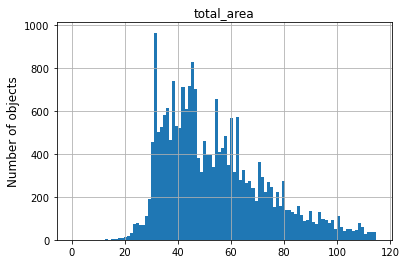

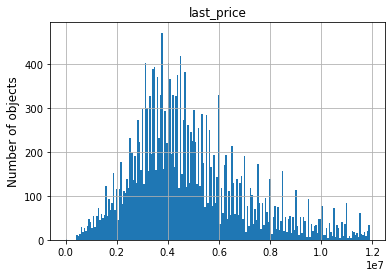

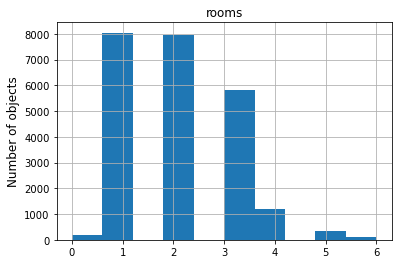

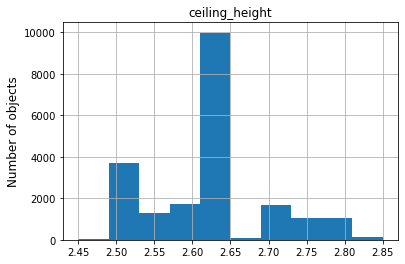

In [37]:
dict_for_auto = {
    'total_area' : [100, (0,500)],
    'last_price' : [200, (100, 8000000)],
    'rooms' : [10, (0, 20)],
    'ceiling_height' : [10, (0, 3)]
}

for column in dict_for_auto.keys():
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    df[column].hist(bins = dict_for_auto[column][0], range = (max(0, quantiles.iloc[0] - 1.5 * iqr), quantiles.iloc[1] + 1.5 * iqr))
    plt.ylabel('Number of objects', fontsize=12)
    plt.title(column)
    plt.show()

In [38]:
# Output descriptive statistics for the column of days when the ad was placed
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [39]:
print("Average ad placement time: {:.0f} days".format(df['days_exposition'].mean()))
print("Median ad placement time: {} days".format(df['days_exposition'].median()))

Average ad placement time: 181 days
Median ad placement time: 95.0 days


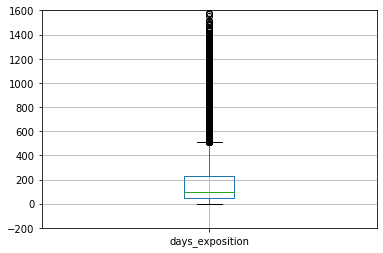

In [40]:
df.boxplot(column='days_exposition')
plt.ylim(-200, 1600)
plt.show()

Usually, the time of sale of an apartment takes 181 days, which is symbolized by the average value. Fast sales of an apartment can be considered if the apartment was sold within a period of up to 45 days, as evidenced by the boundary of the first quantile (25%). A long sale is considered if the apartment is sold after 232 days from the date of placement of the ad, as evidenced by the boundary of 3 quantiles (75%).

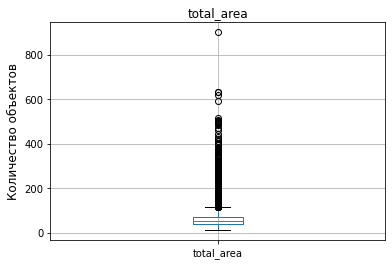

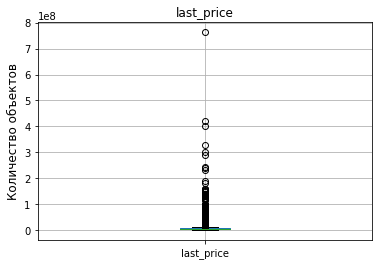

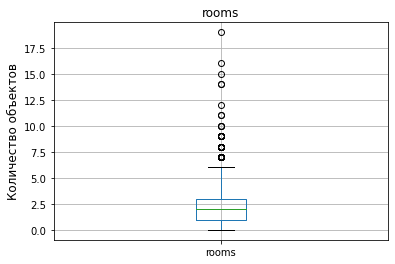

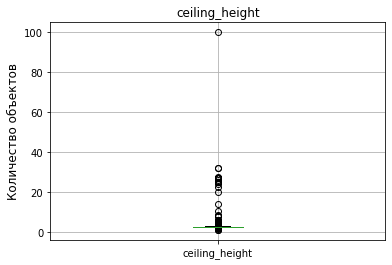

In [41]:
dict_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in dict_columns:
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    df.boxplot(column=column)
    plt.ylabel('Количество объектов', fontsize=12)
    plt.title(column)
    plt.show()

In [42]:
choose_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for column in choose_columns:
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    top_quant = quantiles.iloc[1] + 1.5 * iqr
    bottom_quant =  max(0, quantiles.iloc[0] - 1.5 * iqr) 
    print('Statistical outliers in the {} column can be considered values that are not included in the range from {:.2f} to {:.2f}'.format(column, bottom_quant, top_quant))

Statistical outliers in the total_area column can be considered values that are not included in the range from 0.00 to 114.75
Statistical outliers in the last_price column can be considered values that are not included in the range from 0.00 to 11900000.00
Statistical outliers in the rooms column can be considered values that are not included in the range from 0.00 to 6.00
Statistical outliers in the ceiling_height column can be considered values that are not included in the range from 2.45 to 2.85
Statistical outliers in the days_exposition column can be considered values that are not included in the range from 0.00 to 512.50


In [43]:
df_query = df.query('0 < total_area <= 114.75')
df_query = df_query.query('0 <= rooms <= 6')
df_query = df_query.query('0 < last_price <= 11900000')
df_query = df_query.query('2.45 <= ceiling_height <= 2.85')
df_query = df_query.query('0 <= days_exposition <= 512.50') 
df_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16083 entries, 1 to 23695
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            16083 non-null  int64         
 1   last_price              16083 non-null  int32         
 2   total_area              16083 non-null  float64       
 3   first_day_exposition    16083 non-null  datetime64[ns]
 4   rooms                   16083 non-null  int64         
 5   ceiling_height          16083 non-null  float64       
 6   floors_total            16083 non-null  int32         
 7   living_area             16083 non-null  float64       
 8   floor                   16083 non-null  int64         
 9   is_apartment            16083 non-null  bool          
 10  studio                  16083 non-null  bool          
 11  open_plan               16083 non-null  bool          
 12  kitchen_area            16083 non-null  float6

In [44]:
print('{} values have been reduced.'.format(len(df) - len(df_query)))

7616 values have been reduced.


In the total_area column, you can see sharply outlier values of more than 300 square meters on the span diagram. This may indicate both luxury real estate and suburban real estate. 
In the last_price column, values over 11900,000 rubles can be considered as highlighting values. There are quite a few values over 20000000, as can be seen in the span diagram. We can assume that this is also a luxury property.
In the rooms column, both on the graph and according to calculations, it is obvious that properties with more than 6 rooms are outliers.
A special feature in the ceiling_height column is that there are values above 10 m. For sure, such high ceilings are present in private luxury homes. 
Such values can be reduced because they do not adequately affect the dataset.
Rare and erratic values in the columns total_area, rooms, last_price, ceiling_height, days_exposition were removed according to the span diagram, as well as the calculation of the interquartile span. 7616 values have been reduced.

In [45]:
last_price_total_area =  df_query.pivot_table(index='total_area', values='last_price', aggfunc={'count', 'mean'}).sort_values(by='mean')
last_price_rooms =  df_query.pivot_table(index='rooms', values='last_price', aggfunc={'count', 'median'}).sort_values(by = 'median')
last_price_cityCenters_nearest =  df_query.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_ceiling_height =  df_query.pivot_table(index='ceiling_height', values='last_price', aggfunc='median').sort_values(by = 'last_price').head()

data_for_plot = [last_price_total_area, last_price_rooms, last_price_cityCenters_nearest, last_price_ceiling_height]
for data in data_for_plot:
    data

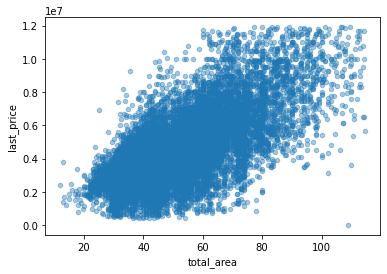

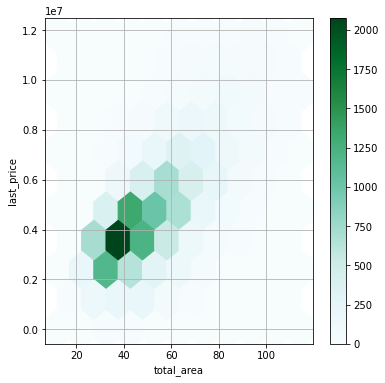

Коэффициент корреляции между total_area и last_price: 0.69.


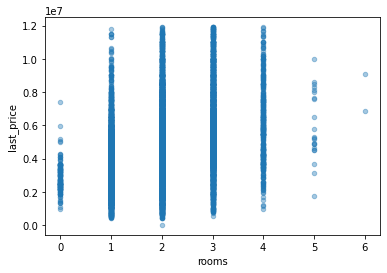

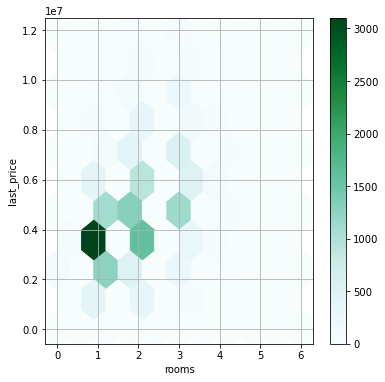

Коэффициент корреляции между rooms и last_price: 0.42.


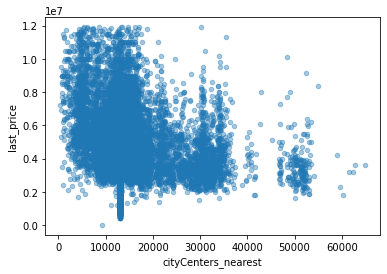

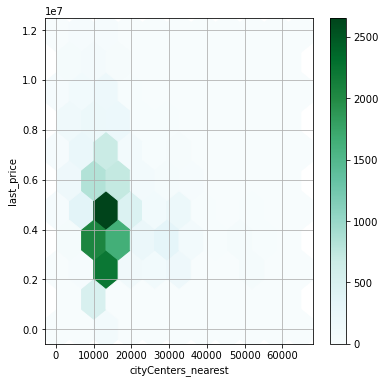

Коэффициент корреляции между cityCenters_nearest и last_price: -0.17.


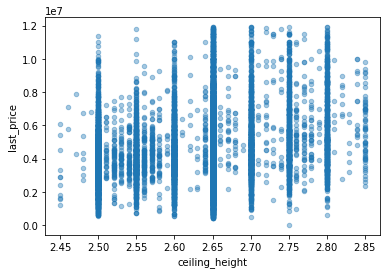

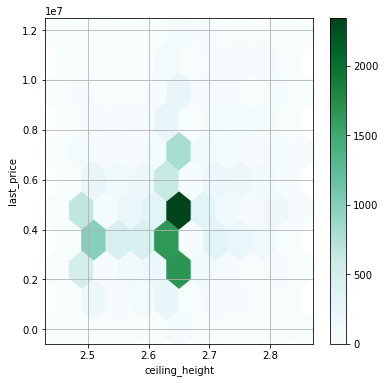

Коэффициент корреляции между ceiling_height и last_price: 0.24.


In [46]:
columns_for_plot = ['total_area', 'rooms', 'cityCenters_nearest', 'ceiling_height']
for column in columns_for_plot:
    df_query.plot(x=column, y='last_price', kind='scatter', alpha=0.4)
    plt.show()
    df_query.plot(x=column, y='last_price', kind='hexbin', gridsize=10, figsize=(6, 6), sharex=False, grid=True)
    plt.show()
    print('Коэффициент корреляции между {} и {}: {:.2f}.'.format(column, 'last_price', df_query[column].corr(df_query['last_price'])))

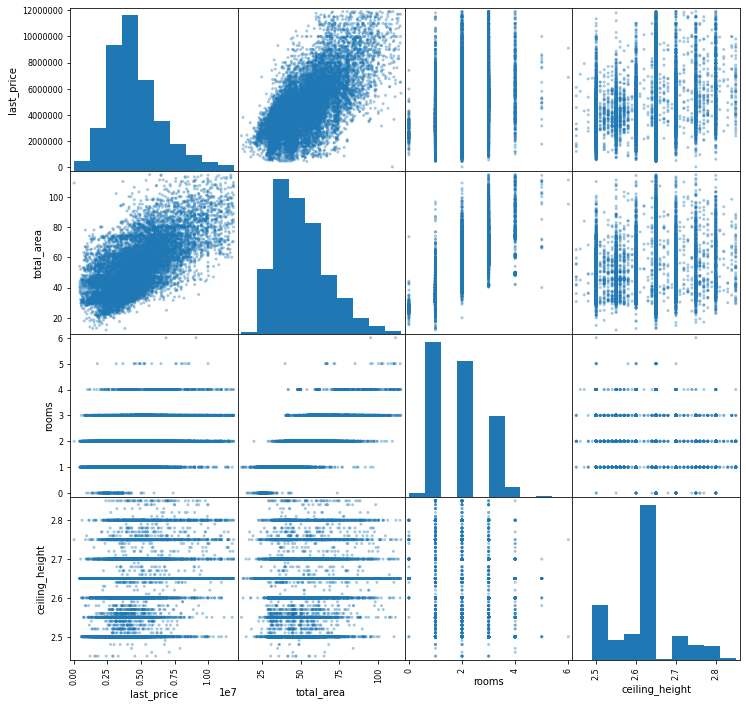

In [47]:
df_query_corr = pd.DataFrame(df_query, columns=['last_price', 'total_area', 'rooms', 'ceiling_height'])
pd.plotting.scatter_matrix(df_query_corr, alpha=0.4, figsize=(12, 12))
plt.show()

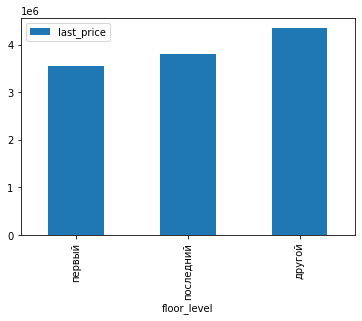

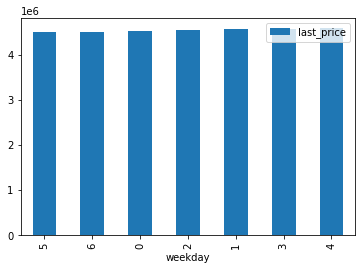

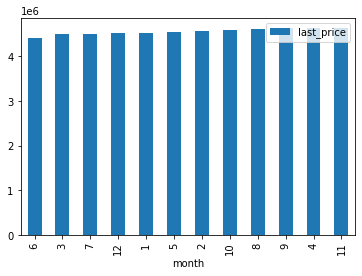

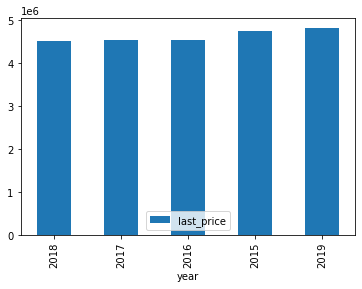

In [48]:
last_price_floor_level =  df_query.pivot_table(index='floor_level', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_weekday =  df_query.pivot_table(index='weekday', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_month =  df_query.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_year =  df_query.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values(by = 'last_price')

data1_for_plot = [last_price_floor_level, last_price_weekday, last_price_month, last_price_year]
for data in data1_for_plot:
    data
    data.sort_values(by ='last_price').plot(y='last_price', kind='bar')
    plt.show()


### Summary

According to the scatter plot graph between the total_area and last_price columns, you can see a directly proportional relationship between the values. The correlation coefficient is 0.69, which indicates a moderate relationship between the two indicators. The largest number of values are in the area where total_area is 40, and last_price is in the region of 4 million rubles (more than 2000 values).
According to the graph of the scatter plot between the columns romms and last_price, you can see that the columns 1,2 and 3 room apartments contain the largest number of apartments. The correlation coefficient is 0.42, which indicates a weak relationship between the two indicators. The largest number of values are in the area where rooms is 1, and last_price is in the region of 4 million rubles (more than 3,000 values).
According to the scatter plot graph between the cityCenter_nearest and last_price columns, you can notice an inversely proportional relationship between the values. The correlation coefficient is -0.17, which indicates an inverse weak relationship between the two indicators. The largest number of values are in the area where cityCenter_nearest is 12,500 m, and last_price is in the region of 5 million rubles (about 2500 values).
According to the scatter plot graph between the ceiling_height and last_price columns, you can see a directly proportional relationship between the values. The correlation coefficient is 0.24, which indicates a weak relationship between the two indicators. The largest number of values are in the area where total_area is 2.65, and last_price is in the region of 4.5 million rubles (more than 2500 values).

According to the floor_level bar chart, it can be clearly observed that apartments with the lowest cost (3550000 rubles) are sold on the ground floor. Apartments that are not on the last and not on the first floor have the highest values of 4330000 rubles.
Ads with the lowest ad price are placed on Saturday and Sunday, and on Friday with the highest cost. Ads with the highest real estate values are placed in the month of the 8th, 9th, 10th, 11th month, this can be explained by the fact that by the end of the year the cost of everything, including apartments, increases. The cost of apartments in 2019 is the highest relative to other years, which may be explained by the fact that after the World Cup there was an influx of investment in residential real estate.

In [49]:
df_query.groupby('locality_name').agg({'price_per_square_meter' : ['count', 'mean']}).sort_values(by=('price_per_square_meter', 'count'), ascending=False).head(10)

price_per_square_meter               
                                 count           mean
locality_name                                        
Санкт-Петербург                  10055  103663.834894
Мурино                             513   85969.953021
Кудрово                            403   94594.872854
Шушары                             382   77901.216126
Всеволожск                         294   66712.283333
Парголово                          287   89336.953763
Колпино                            275   74703.574509
Пушкин                             233   98717.144034
Гатчина                            227   67859.796388
Выборг                             174   56856.478161

### Summary

The largest number of ads was registered in St. Petersburg (10055 values), and in St. Petersburg the highest average cost per square meter is 103664 rubles/meter.2 The smallest number of ads in the top 10 are placed in Vyborg (174 values), and there is also the lowest cost per square meter out of the top 10 - 56856 rubles/meter.2

<AxesSubplot:xlabel='cityCenters_nearest_km'>

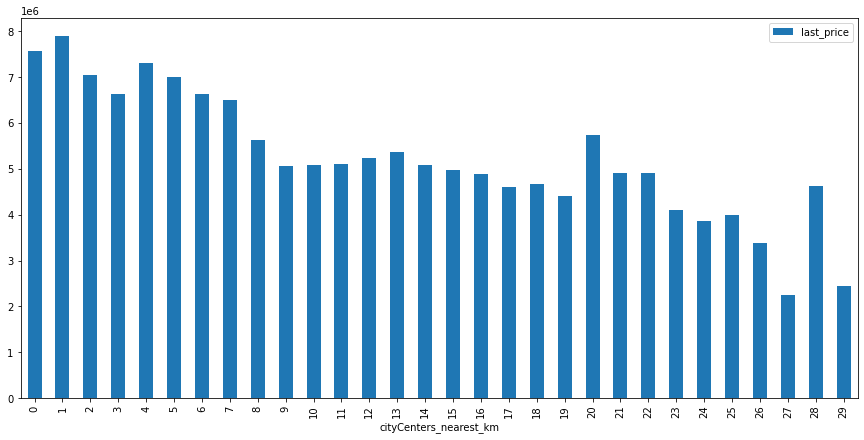

In [50]:
df_query['cityCenters_nearest_km'] = df_query['cityCenters_nearest'] / 1000
df_query['cityCenters_nearest_km'] = df_query['cityCenters_nearest_km'].astype('int')
spb = df_query.query('locality_name == "Санкт-Петербург"')
spb.groupby('cityCenters_nearest_km').agg({'last_price' : 'mean'}).sort_values(by='cityCenters_nearest_km').plot(kind='bar', figsize=(15,7))

In [51]:
spb_center = spb.query('cityCenters_nearest_km <= 8')
spb_uptown = spb.query('cityCenters_nearest_km > 8')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_price_mln,price_per_square_meter,weekday,month,year,floor_level,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265.0,6.50,66872.43,5,10,2015,первый,0.478395,0.201646,2
70,9,3400000,30.0,2018-09-05,1,2.65,5,16.0,1,False,...,14.0,3.40,113333.33,2,9,2018,первый,0.533333,0.233333,8
94,3,3500000,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,4.0,3.50,118644.07,4,4,2019,другой,0.528814,0.186441,7
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,104.0,9.60,106666.67,1,9,2017,другой,0.744444,0.088889,2
111,4,4590000,40.0,2017-05-29,1,2.65,6,18.0,1,False,...,31.0,4.59,114750.00,0,5,2017,первый,0.450000,0.250000,6


### Summary

According to the schedule of the average price per kilometer, apartments in the center can be considered apartments within 8 km. At this point, the chart changes a lot, which means this is the central zone.

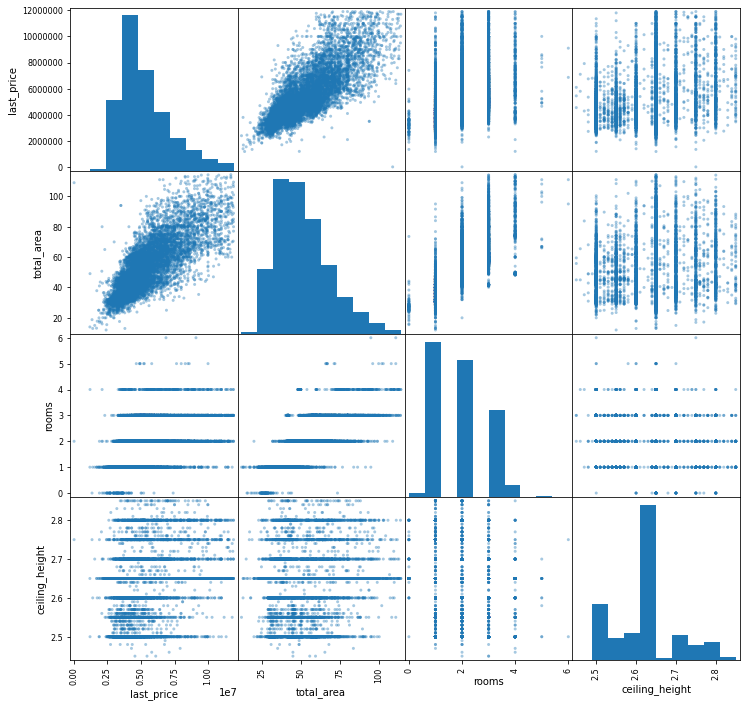

In [52]:
# Building a correlation matrix for St. Petersburg
sbp_corr = pd.DataFrame(spb, columns=['last_price', 'total_area', 'rooms', 'ceiling_height']) 
pd.plotting.scatter_matrix(sbp_corr, alpha=0.4, figsize=(12, 12))
plt.show()

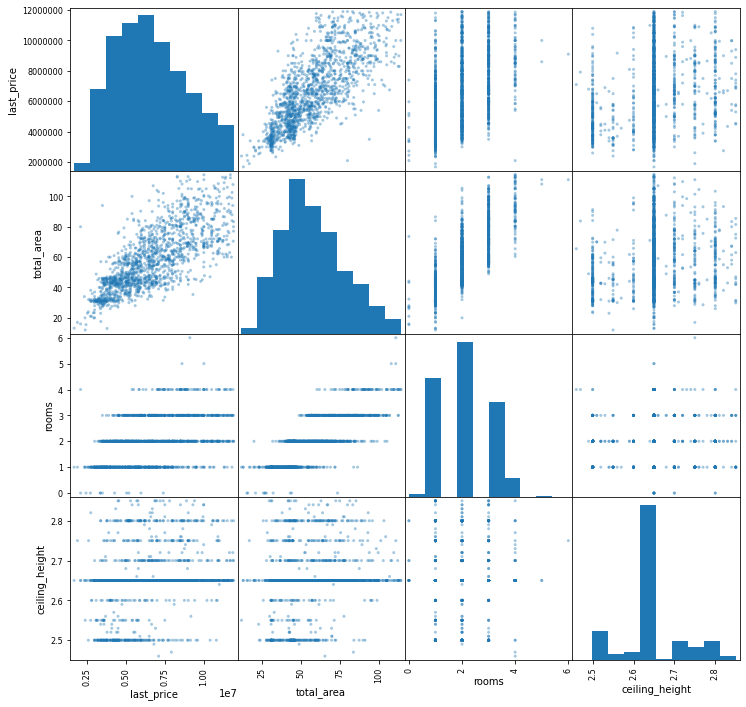

In [53]:
# Building a correlation matrix for the center of St. Petersburg
sbp_center_corr = pd.DataFrame(spb_center, columns=['last_price', 'total_area', 'rooms', 'ceiling_height']) 
pd.plotting.scatter_matrix(sbp_center_corr, alpha=0.4, figsize=(12, 12))
plt.show()

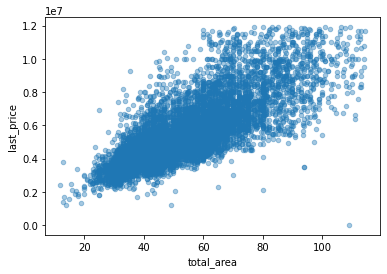

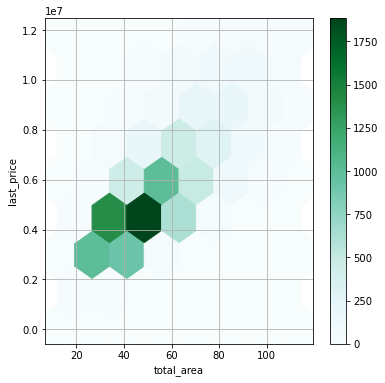

For real estate in St. Petersburg as a whole, the correlation coefficient between total_area and last_price: 0.80.


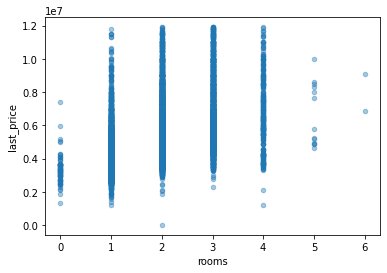

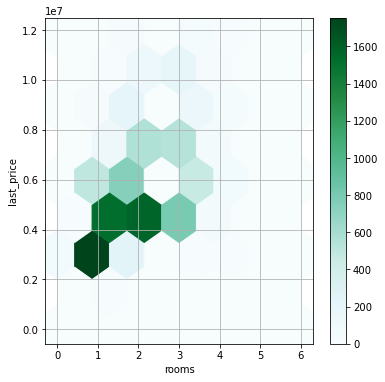

For real estate in St. Petersburg as a whole, the correlation coefficient between rooms and last_price: 0.49.


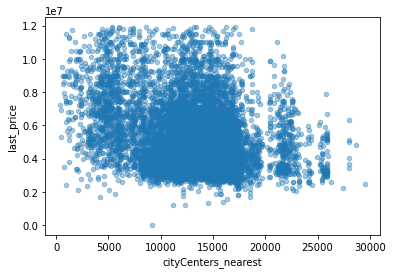

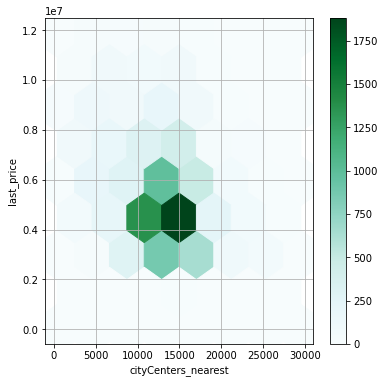

For real estate in St. Petersburg as a whole, the correlation coefficient between cityCenters_nearest and last_price: -0.28.


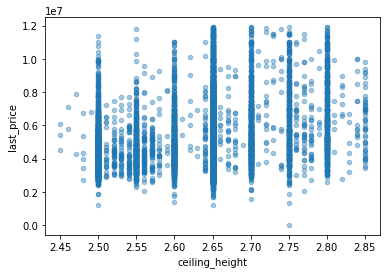

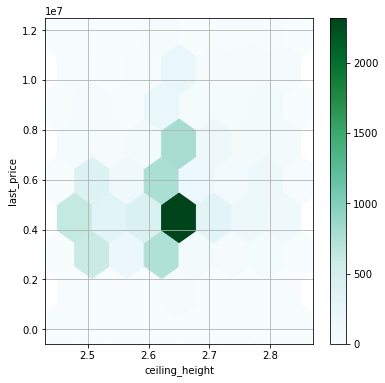

For real estate in St. Petersburg as a whole, the correlation coefficient between ceiling_height and last_price: 0.27.


In [54]:
# Plotting and finding correlation coefficients
columns_for_plot = ['total_area', 'rooms', 'cityCenters_nearest', 'ceiling_height']
for column in columns_for_plot:
    spb.plot(x=column, y='last_price', kind='scatter', alpha=0.4)
    plt.show()
    spb.plot(x=column, y='last_price', kind='hexbin', gridsize=7, figsize=(6, 6), sharex=False, grid=True)
    plt.show()
    print('For real estate in St. Petersburg as a whole, the correlation coefficient between {} and {}: {:.2f}.'.format(column, 'last_price', spb[column].corr(spb['last_price'])))

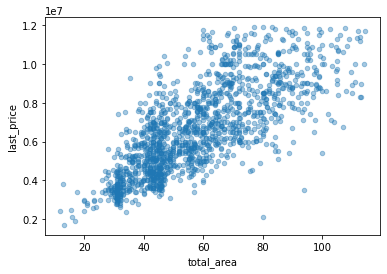

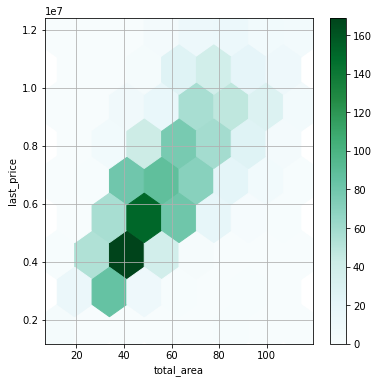

For real estate in the center of St. Petersburg, the correlation coefficient between total_area and last_price: 0.75.


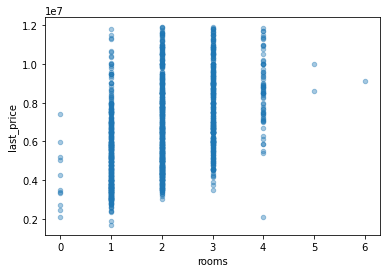

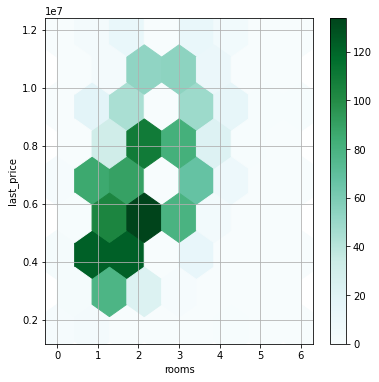

For real estate in the center of St. Petersburg, the correlation coefficient between rooms and last_price: 0.45.


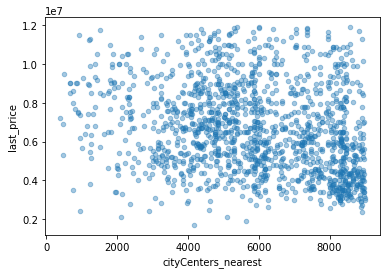

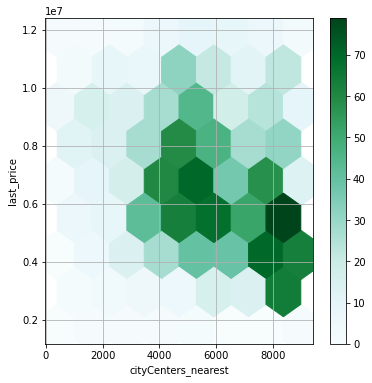

For real estate in the center of St. Petersburg, the correlation coefficient between cityCenters_nearest and last_price: -0.24.


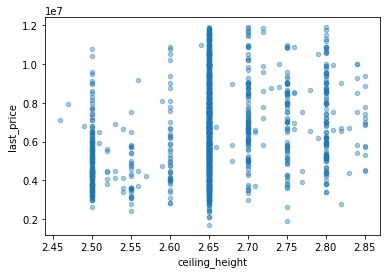

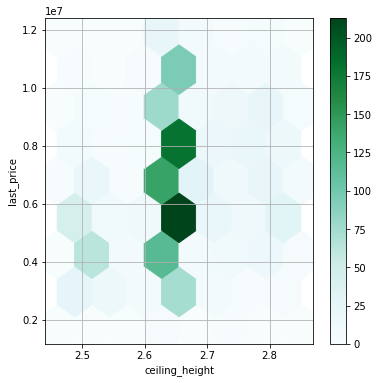

For real estate in the center of St. Petersburg, the correlation coefficient between ceiling_height and last_price: 0.25.


In [55]:
for column in columns_for_plot:
    spb_center.plot(x=column, y='last_price', kind='scatter', alpha=0.4)
    plt.show()
    spb_center.plot(x=column, y='last_price', kind='hexbin', gridsize=7, figsize=(6, 6), sharex=False, grid=True)
    plt.show()
    print('For real estate in the center of St. Petersburg, the correlation coefficient between {} and {}: {:.2f}.'.format(column, 'last_price', spb_center[column].corr(spb_center['last_price'])))

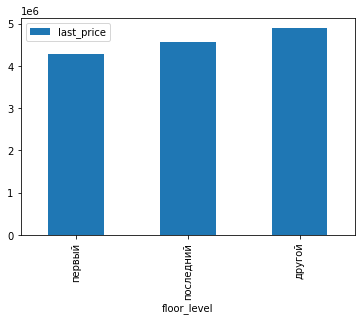

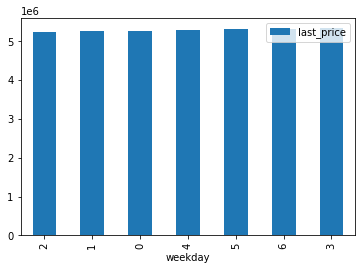

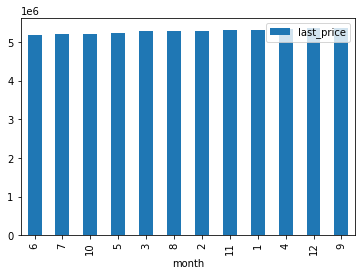

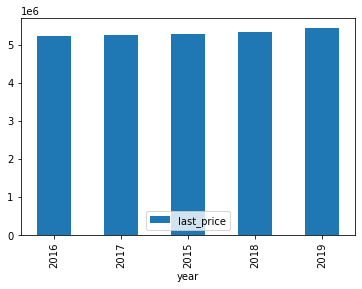

In [56]:
last_price_floor_level_spb =  spb.pivot_table(index='floor_level', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_weekday_spb =  spb.pivot_table(index='weekday', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_month_spb =  spb.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_year_spb =  spb.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values(by = 'last_price')

data1_for_plot = [last_price_floor_level_spb, last_price_weekday_spb, last_price_month_spb, last_price_year_spb]
for data in data1_for_plot:
    data
    data.sort_values(by = 'last_price').plot(y='last_price', kind='bar')
    plt.show()

             last_price
floor_level            
первый          5050000
последний       6400000
другой          6700000


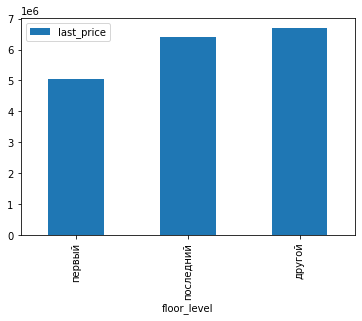

           last_price
weekday              
3        6.492837e+06
1        6.565537e+06
0        6.594434e+06
2        6.637380e+06
4        6.685733e+06
5        6.748914e+06
6        7.095168e+06


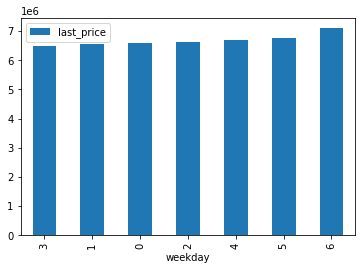

         last_price
month              
6      6.305328e+06
5      6.436050e+06
10     6.459647e+06
7      6.571853e+06
12     6.612279e+06
2      6.613866e+06
4      6.620218e+06
1      6.667978e+06
3      6.694526e+06
8      6.777641e+06
9      6.879861e+06
11     6.929522e+06


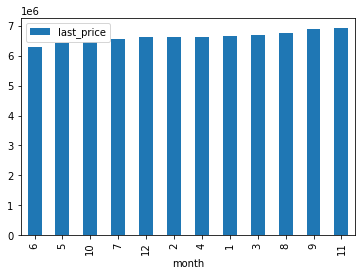

        last_price
year              
2019  6.377792e+06
2015  6.459148e+06
2018  6.565609e+06
2016  6.683181e+06
2017  6.727651e+06


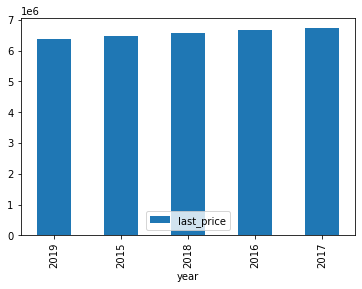

In [57]:
last_price_floor_level_spb_center =  spb_center.pivot_table(index='floor_level', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_weekday_spb_center =  spb_center.pivot_table(index='weekday', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_month_spb_center =  spb_center.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_year_spb_center =  spb_center.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values(by = 'last_price')

data1_for_plot = [last_price_floor_level_spb_center, last_price_weekday_spb_center, last_price_month_spb_center, last_price_year_spb_center]
for data in data1_for_plot:
    print(data)
    data.sort_values(by = 'last_price').plot(y='last_price', kind='bar')
    plt.show()

### Summary

In general, there are quite strong differences between apartments in St. Petersburg and in the center of St. Petersburg. 
According to the scatter plot graph between the total_area and last_price columns, you can see a directly proportional relationship between the values. The correlation coefficient is 0.8, which indicates a strong relationship between the two indicators in St. Petersburg, in the center of St. Petersburg this value is 0.75, which also indicates a strong relationship between the indicators. The largest number of values For St. Petersburg are in the region where total_area is 50, and last_price is in the region of 5 million rubles (about 1750 values). For the center, about 160 objects are also within this framework.
According to the graph of the scatter plot between the columns romms and last_price, you can see that columns 1,2 and 3 room apartments contain the largest number of apartments. The correlation coefficient for St. Petersburg is 0.49, which indicates a weak connection between the two indicators, for the center the coefficient is 0.45, which also indicates a weak connection. The largest number of values for St. Petersburg are in the area where rooms is 1, and last_price is in the area of 3.5 million rubles (more than 1600 values). For the city center, the highest value (120 objects) is two-room apartments worth 5.8 million rubles. 
According to the scatter plot graph between the cityCenter_nearest and last_price columns, you can notice an inversely proportional relationship between the values. The correlation coefficient for St. Petersburg is -0.28, which indicates an inverse weak relationship between the two indicators. The largest number of values are in the area where cityCenter_nearest is 15,000 m, and last_price is in the region of 5 million rubles (about 1750 values). Similar statistics can be given for the center, where the correlation coefficient is -0.24, which also indicates a weak inversely proportional relationship between the indicators. All objects are generally evenly spaced, but about 70 objects stand out at a distance of 8000 m and cost 6 million rubles.  
According to the scatter plot graph between the ceiling_height and last_price columns, you can see a directly proportional relationship between the values. The correlation coefficient for St. Petersburg is 0.27, which indicates a weak relationship between the two indicators. The largest number of values are in the area where total_area is 2.65, and last_price is in the region of 5 million rubles (more than 3,000 values). In the center, the situation is almost similar, as evidenced by the correlation coefficient of 0.25 (weak correlation of indicators). About 200 properties have a value of 6 million with a ceiling height of 2.65 m. 

According to the floor_level bar chart, it can be clearly observed that apartments with the lowest cost (4277,500 rubles) are sold on the ground floor in St. Petersburg. The apartments that are not on the last and not on the first floor have the highest values of 4,900,000 rubles. The same distribution is typical for the center of St. Petersburg. The lowest cost is 5050000 on the ground floor. For other floors, the average cost is 6,700,000. 
On Wednesday, ads with the lowest ad price in St. Petersburg are placed, and on Thursday with the highest cost. For the center of St. Petersburg, ads with the lowest cost are placed on Thursday, while ads with the highest cost were placed on Sunday. 
Ads with the highest real estate values, both in St. Petersburg and the center of St. Petersburg, are placed at the beginning of the year at the end of the year and the beginning of the autumn season in September, this can be explained by the fact that by the end of the year the cost of everything, including apartments, increases. The cost of apartments in 2019 in St. Petersburg is the highest relative to other years, which may be explained by the fact that after the World Cup there was an influx of investment in residential real estate. In the center, on the contrary, in 2019 the cost of apartments was low.

# Summary

Various data processing tools were used in the project, omissions were removed, data types were replaced, duplicates were processed, and lemmatization was carried out.
In the original data, there were 23699 values in 22 columns, as well as 14 columns with missing values.
As part of the data preprocessing, the values in the columns were filled in, depending on the nature of the column data. In some columns, the data was changed to "0", in some to the median values. 
After the preprocessing of the data, the highlighted and superfluous values were deleted according to the graphs and calculations. We obtained typical sample observations from the general population. 
As part of the analysis of the sample, it was revealed that 4 main factors affect the cost of an apartment: total_area, ceiling_height, rooms, cityCenter_nearest. The biggest impact is the indicator of the total area of the object. This is well shown by both the sample population and the analysis of only St. Petersburg and the center of St. Petersburg. On average, the influence of this factor is strong (the correlation coefficient is about 0.7). 
Apartments in the center of St. Petersburg have a higher cost than apartments in the whole region and apartments in St. Petersburg, which is logical, because St. Petersburg is one of the largest cities and is one of the "capitals" of Russia. 
The analysis also revealed that the correlation coefficients, as well as the scattering diagrams for St. Petersburg and the center of St. Petersburg, are approximately equal to the indicators of the sample population for the region. This means that the analysis was performed correctly and we can extend the conclusions to the general population.